# Numerical Methods Using Python

This notebook aims to introduce some numerical methods to solve differential equations in the field of quantum physics. We will solve the Schrödinger equation for some fixed potentials as well as for some Hamiltonians that cannot be solved analytically.

In [1]:
#Libraries to be used.
import numpy as np
import matplotlib.pyplot as plt

## Euler Method
Firts we will to discuss the principal method to solve ODE with the following form: This method have a linear error of $O(h)$. 
$$ \frac{dy}{dx} = f(x,y) $$
With initial condictions $y(x_i) = y_i$.  
The Euler method can be develop as:
$$ y_{i+1} = y_i + h\cdot f(x_i,y_i) $$
$$ x_{i+i} = x_i + h $$

In [2]:
def euler(function, h,x_init,y_init, x_final):

    x_list = [x_init]
    y_list = [y_init]

    x = x_init
    y = y_init

    points = np.arange(x_init, x_final, h)

    for i in range(len(points)):
        y = y + h*(function(x,y))
        y_list.append(y)
        x = x + h
        x_list.append(x)

    return np.array(x_list),np.array(y_list)

## RK4

This is one of the best known and most useful algorithms for solving ODEs. The error is a polynomial $O(h^4)$. The procedure is as follows: This algorithm (like most of them, always needs the initial conditions)

$$   y_{i+1} = y_{i} + \frac{1}{6}(K_1+2K_2+2K_3+K_4)\cdot h $$
$$ x_{i+1} = x_i + h $$
Where all the K terms can be calculate as follow:
$$ K_1 = f(x_i,y_i) $$
$$ K_2 = f(x_i+\frac{1}{2}h, y_i+\frac{1}{2}K_1 h) $$
$$ K_3 = f(x_i+\frac{1}{2}h, y_i+\frac{1}{2}K_2 h) $$
$$ K_4 = f(x_i+h, y_i+K_3 h) $$

In [53]:
def RK4(function, h,x_init,y_init, x_final):

    x_list = [x_init]
    y_list = [y_init]

    x = x_init
    y = y_init

    points = np.arange(x_init, x_final, h)

    for i in range(len(points)):
        k1 = function(x,y)
        k2 = function(x+0.5*h, y+0.5*k1*h)
        k3 = function(x+0.5*h, y+0.5*k2*h)
        k4 = function(x+h, y+k3*h)
        
        y = y + (1/6)*h*(k1+2*k2+2*k3+k4)
        y_list.append(y)
        x = x + h
        x_list.append(x)

    return np.array(x_list),np.array(y_list)

Now, we will compare the two methods using a very simple ODE as:
$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5 $$
$$ y(0) = 2$$

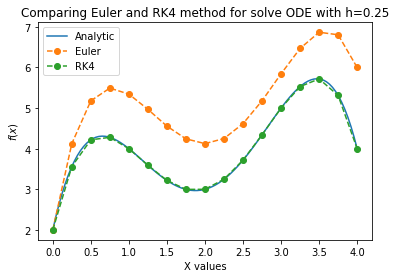

In [54]:
## Comparing the two methods we have the following:
final_step = 4

x = np.linspace(0,final_step,100)
y_a = -0.5*x**4+4*x**3-10*x**2+8.5*x+2

func = lambda x,y : -2*x**3+12*x**2-20*x+8.5

x_init = 0
y_init = 2
h = 0.25
x_eu, y_eu = euler(func,h,x_init, y_init,final_step)
x_rk4, y_rk4 = RK4(func,h,x_init, y_init,final_step)

plt.plot(x,y_a,label='Analytic')
plt.plot(x_eu, y_eu,'o--',label='Euler')
plt.plot(x_rk4, y_rk4,'o--',label='RK4')
plt.xlabel("X values")
plt.ylabel("$f(x)$")
plt.title("Comparing Euler and RK4 method for solve ODE with h={}".format(h))
plt.legend()
plt.show()

The same method can be used to solve a second differential equation. Using RK4 to compute two different normal differential equation at the same time.

$$ \frac{dy^2}{dx^2} + 2\frac{dy}{dx} + y = 2e^x $$

With:

$$ y(-1.4) = -1.5 $$
$$ y'(-1.4) = 5.55 $$

In [64]:
def rk4su(func1, func2,h, x_init, y_init, u_init, x_final):

    x_list = [x_init]
    y_list = [y_init]
    u_list = [u_init]

    points = np.arange(x_init, x_final, h)

    x = x_init
    y = y_init
    u = u_init

    for i in range(len(points)):

        k1_1 = func1(x,u)
        k1_2 = func2(x,y,u)

        k2_1 = func1(x+0.5*h, u+0.5*k1_2*h)
        k2_2 = func2(x+0.5*h, y+0.5*k1_1*h, u+0.5*k1_2*h)

        k3_1 = func1(x+0.5*h, u+0.5*k2_2*h)
        k3_2 = func2(x+0.5*h, y+0.5*k2_1*h, u+0.5*k2_2*h)

        k4_1 = func1(x+h, u+k3_2*h)
        k4_2 = func2(x+h, y+k3_1*h, u+k3_2*h)

        u = u + (1/6)*h*(k1_2+2*k2_2+2*k3_2+k4_2)
        y = y + (1/6)*h*(k1_1+2*k2_1+2*k3_1+k4_1)
        x = x + h

        x_list.append(x)
        y_list.append(y)
        u_list.append(u)

    return np.array(x_list),np.array(y_list),np.array(u_list)

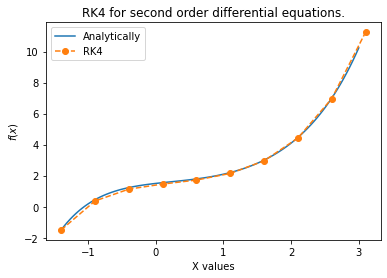

In [101]:
final_step = 3

func1 = lambda x,u : u
func2 = lambda x,y,u : 2*np.exp(x)-2*u-y

x_init = -1.4
y_init = -1.5
yp_init = 5.55
h = 0.5

x = np.linspace(x_init,final_step,100)
y_real = 1*np.exp(-x)+1*x*np.exp(-x)+0.5*np.exp(x)

x_a, y_a, u_a = rk4su(func1, func2, h, x_init, y_init, yp_init, final_step)

plt.plot(x, y_real,label="Analytically")
plt.plot(x_a, y_a,'o--',label="RK4")
plt.legend()
plt.title("RK4 for second order differential equations.")
plt.xlabel("X values")
plt.ylabel("$f(x)$")
plt.show()